In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
sns.set()

In [2]:
data=pd.read_csv("./birth.csv")

In [3]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [6]:
data['day'].fillna(0,inplace=True)

In [7]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [8]:
data['decade'] = 10 * (data['year'] // 10)

In [9]:
data.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<AxesSubplot:xlabel='decade'>

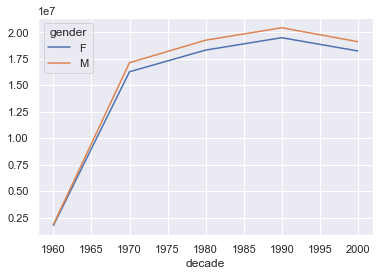

In [10]:
data.pivot_table('births', index='decade', columns='gender', aggfunc='sum').plot()

In [11]:
quartiles = np.percentile(data['births'], [25, 50, 75])
mean=quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])

In [12]:
sigma

689.31

In [13]:
births = data[(data['births'] > mean - 5 * sigma) & (data['births'] < mean + 5 * sigma)]
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [14]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


In [15]:
births['weekday'] = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     14610 non-null  int64         
 1   month    14610 non-null  int64         
 2   day      14610 non-null  float64       
 3   gender   14610 non-null  object        
 4   births   14610 non-null  int64         
 5   decade   14610 non-null  int64         
 6   weekday  14610 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 913.1+ KB


<ipython-input-15-1cc46e199b03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births['weekday'] = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')


In [17]:
births.reset_index(inplace=True)

In [23]:
births.drop(["index","year","month","day"],axis=1)

,gender,births,decade,weekday
0,F,4046,1960,1969-01-01
1,M,4440,1960,1969-01-01
2,F,4454,1960,1969-01-02
3,M,4548,1960,1969-01-02
4,F,4548,1960,1969-01-03
...,...,...,...,...
14605,M,5944,1980,1988-12-29
14606,F,5742,1980,1988-12-30
14607,M,6095,1980,1988-12-30
14608,F,4435,1980,1988-12-31


In [26]:
births["Day"] = births["weekday"].dt.dayofweek
births

<ipython-input-26-341dbe149e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  births["Day"] = births["weekday"].dt.dayofweek


,index,year,month,day,gender,births,decade,weekday,Day
0,0,1969,1,1.0,F,4046,1960,1969-01-01,2
1,1,1969,1,1.0,M,4440,1960,1969-01-01,2
2,2,1969,1,2.0,F,4454,1960,1969-01-02,3
3,3,1969,1,2.0,M,4548,1960,1969-01-02,3
4,4,1969,1,3.0,F,4548,1960,1969-01-03,4
...,...,...,...,...,...,...,...,...,...
14605,15062,1988,12,29.0,M,5944,1980,1988-12-29,3
14606,15063,1988,12,30.0,F,5742,1980,1988-12-30,4
14607,15064,1988,12,30.0,M,6095,1980,1988-12-30,4
14608,15065,1988,12,31.0,F,4435,1980,1988-12-31,5


In [29]:
births_day = births.pivot_table('births', index='Day',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

<AxesSubplot:>

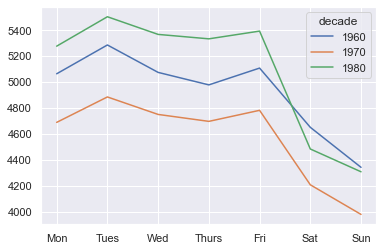

In [30]:
births_day.plot()